In [8]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Câu hỏi: Tháng nào có lượng giao dịch trong nội bộ cao nhất (tức là các cổ đông lớn có xu hướng bán tháo và đầu cơ cổ phiếu) sẽ làm cho giá cổ phiếu giảm
Trả lời được câu hỏi này sẽ giúp chúng ta có thể suy đoán được vào thời điểm nào trong năm giá cổ phiếu sẽ có xu hướng giảm -> bắt đáy cho năm sau

In [3]:
df_insider=pd.read_csv("data-csv/insider_actions.csv", index_col=0)
df_insider['date']=pd.to_datetime(df_insider['date'],format='%Y-%m-%d')
df_insider.head(10)

,date,shareholder,shareholder position,trading type,shares
0,2022-09-05,Nguyễn Thu Phương,Khác,Bán,359500
1,2022-08-31,Nguyễn Thu Phương,Khác,Bán,615800
2,2022-06-29,Nguyễn Thị Bổn,Khác,Bán,966100
3,2022-06-20,Nguyễn Thị Bổn,Khác,Đăng ký bán,966100
4,2022-05-30,Hồ Xuân Vinh,Thành viên HĐQT,Mua,100000
5,2022-05-25,Nguyễn Thị Thanh,Chủ tịch HĐQT,Mua,100000
6,2022-05-05,Hồ Xuân Vinh,Thành viên HĐQT,Đăng ký mua,100000
7,2022-04-27,Nguyễn Thị Thanh,Chủ tịch HĐQT,Đăng ký mua,100000
8,2021-11-19,CTCP Đầu tư Châu Á - Thái Bình Dương,Khác,Bán,1000000
9,2021-11-02,CTCP Đầu tư Châu Á - Thái Bình Dương,Khác,Đăng ký bán,1000000


Lấy dữ liệu từ 1/1/2022 đến ngày hiện tại

In [5]:
first_day = np.datetime64("2022-01-01")
today = np.datetime64('today', 'D')
df_insider_ques = df_insider[df_insider['date'].between(first_day, today)]
df_insider_ques.head(10)

,date,shareholder,shareholder position,trading type,shares
0,2022-09-05,Nguyễn Thu Phương,Khác,Bán,359500
1,2022-08-31,Nguyễn Thu Phương,Khác,Bán,615800
2,2022-06-29,Nguyễn Thị Bổn,Khác,Bán,966100
3,2022-06-20,Nguyễn Thị Bổn,Khác,Đăng ký bán,966100
4,2022-05-30,Hồ Xuân Vinh,Thành viên HĐQT,Mua,100000
5,2022-05-25,Nguyễn Thị Thanh,Chủ tịch HĐQT,Mua,100000
6,2022-05-05,Hồ Xuân Vinh,Thành viên HĐQT,Đăng ký mua,100000
7,2022-04-27,Nguyễn Thị Thanh,Chủ tịch HĐQT,Đăng ký mua,100000


Hàm hỗ trợ lấy ngày đầu tiên, và ngày cuối cùng của 1 tháng

In [6]:
def getFirstLastDate(month):
    if month==1 or month ==3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        last = 31
    elif month == 2:
        last = 28
    else:
        last = 30
    
    if month < 10:
        first_day_of_month = np.datetime64("2022-0{}-01".format(month))
        last_day_of_month = np.datetime64("2022-0{}-{}".format(month,last))
    else:
        first_day_of_month = np.datetime64("2022-{}-01".format(month))
        last_day_of_month = np.datetime64("2022-{}-{}".format(month,last))
    tuple_day = (first_day_of_month, last_day_of_month)
    return tuple_day

Tìm tháng nào có lượng bán cổ phiếu nhiều nhất

In [11]:
month = []
sell_month = []
share = df_insider_ques["shares"]
date_array = df_insider_ques["date"]

current_month = 1

while(current_month <= 12):
    month.append(current_month)
    tuple_day = getFirstLastDate(current_month)
    sub_df_insider_ques = df_insider_ques[df_insider_ques['date'].between(tuple_day[0], tuple_day[1])]
    share_sum = sum(sub_df_insider_ques["shares"])
    sell_month.append(share_sum)
    current_month+=1

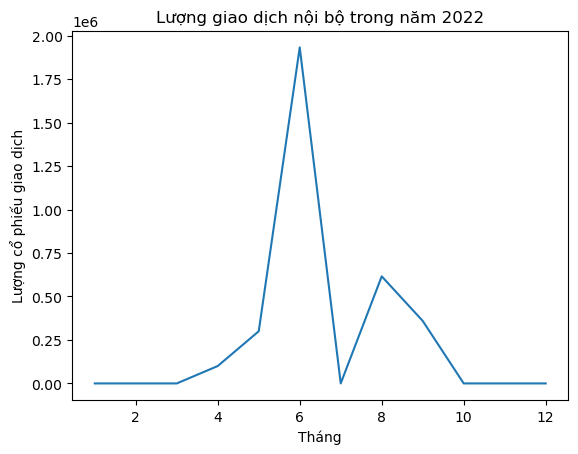

In [16]:
plt.plot(month, sell_month)
plt.xlabel("Tháng")
plt.ylabel("Lượng cổ phiếu giao dịch")
plt.title("Lượng giao dịch nội bộ trong năm 2022")
plt.show()

Qua đồ thị trên, ta có thể rút ra vài nhận xét:
- Giai đoạn đầu năm (tháng 1 - tháng 3) lượng giao dịch cổ phiếu = 0. Điều này có thể lý giải bằng việc giai đoạn này là cận Tết và sau Tết, thị trường chứng khoán không sôi động
- Đồ thị đạt đỉnh ở tháng 6, đây là thời điểm giữa năm, nên lượng giao dịch sẽ rất lớn
- Tháng 8 trở đi, lượng giao dịch nội bộ bắt đầu giảm, có vẻ vì đây cũng là thời điểm cuối năm dương lịch, thị trường đi xuống.